In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
##Loading datset

# Load data from URL using pandas read_csv method
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv')

df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [3]:
#transforming DateTime column into index
df = df.set_index('DateTime')
df.index = pd.to_datetime(df.index)

In [4]:
df.describe

<bound method NDFrame.describe of                      Temperature  Humidity  Wind Speed  general diffuse flows  \
DateTime                                                                        
2017-01-01 00:00:00        6.559      73.8       0.083                  0.051   
2017-01-01 00:10:00        6.414      74.5       0.083                  0.070   
2017-01-01 00:20:00        6.313      74.5       0.080                  0.062   
2017-01-01 00:30:00        6.121      75.0       0.083                  0.091   
2017-01-01 00:40:00        5.921      75.7       0.081                  0.048   
...                          ...       ...         ...                    ...   
2017-12-30 23:10:00        7.010      72.4       0.080                  0.040   
2017-12-30 23:20:00        6.947      72.6       0.082                  0.051   
2017-12-30 23:30:00        6.900      72.8       0.086                  0.084   
2017-12-30 23:40:00        6.758      73.0       0.080                  0.0

In [5]:
df.columns.isnull()

array([False, False, False, False, False, False, False, False])

In [6]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)


                           Temperature  Humidity  Wind Speed  \
Temperature                   1.000000 -0.460243    0.477109   
Humidity                     -0.460243  1.000000   -0.135853   
Wind Speed                    0.477109 -0.135853    1.000000   
general diffuse flows         0.460294 -0.468138    0.133733   
diffuse flows                 0.196522 -0.256886   -0.000972   
Zone 1 Power Consumption      0.440221 -0.287421    0.167444   
Zone 2  Power Consumption     0.382428 -0.294961    0.146413   
Zone 3  Power Consumption     0.489527 -0.233022    0.278641   

                           general diffuse flows  diffuse flows  \
Temperature                             0.460294       0.196522   
Humidity                               -0.468138      -0.256886   
Wind Speed                              0.133733      -0.000972   
general diffuse flows                   1.000000       0.564718   
diffuse flows                           0.564718       1.000000   
Zone 1 Power Consumpt

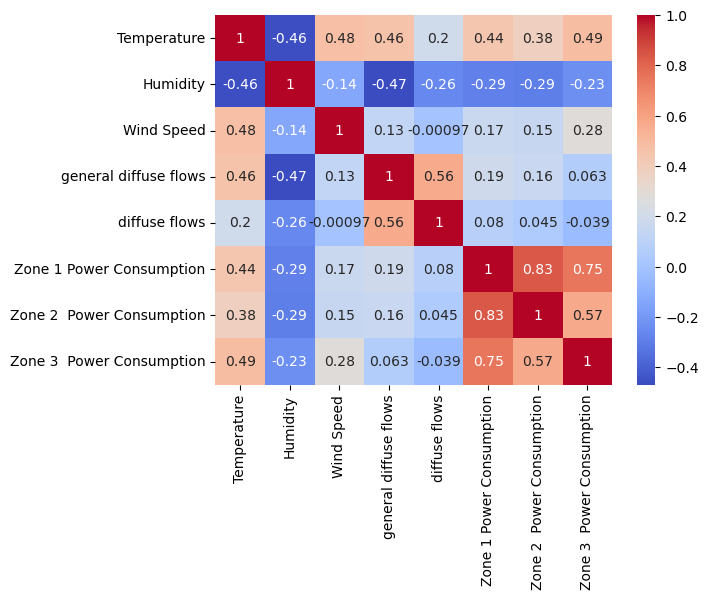

In [7]:
# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()


In [8]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df
df = create_features(df)

<AxesSubplot:title={'center':'Power Consumption vs Hours'}, xlabel='hour', ylabel='Zone 1 Power Consumption'>

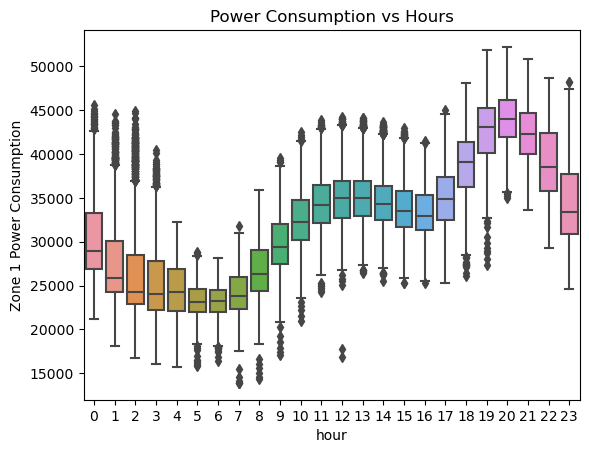

In [10]:
# Create a box plot of power consumption vs. hour
plt.title('Power Consumption vs Hours')
sns.boxplot(x='hour', y='Zone 1 Power Consumption', data=df)

<AxesSubplot:title={'center':'Power Consumption vs Hours'}, xlabel='hour', ylabel='Humidity'>

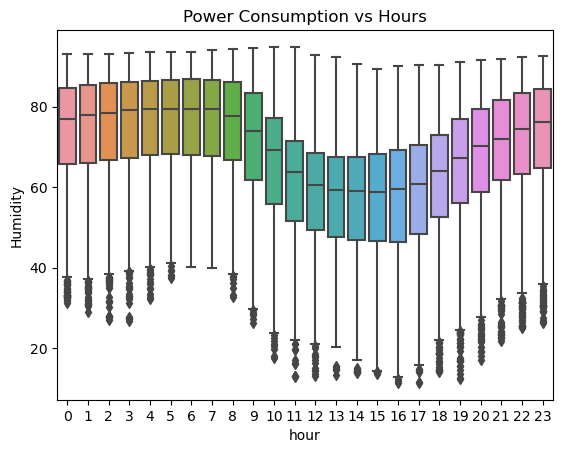

In [12]:
# Create a box plot of power consumption vs. hour
plt.title('Power Consumption vs Hours')
sns.boxplot(x='hour', y='Humidity', data=df)
